<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Clustering_Campaign_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Clustering dengan K-Means dan Agglomerative

##1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

##2. Load Dataset

In [3]:
df = pd.read_csv("clusteringcampaign.csv")
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


##3. Eksplorasi Data dan Preprocessing

In [4]:
df.info()

# Cek missing values
print("\nMissing values per kolom:")
print(df.isnull().sum())

# Drop kolom yang tidak berguna atau terlalu banyak missing (optional)
# df = df.drop(columns=['...'])

# Handle kategorikal data kalau ada
df_encoded = pd.get_dummies(df, drop_first=True)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

##4.  K-Means Clustering

In [6]:
# Kita mulai dengan K=3 misalnya
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Tambahkan label ke data
df['KMeans_Cluster'] = kmeans_labels

##5. Agglomerative Clustering (Hierarchical)

In [7]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_data)

# Tambahkan label ke data
df['Agglo_Cluster'] = agglo_labels

##6. Visualisasi Cluster dengan PCA (untuk dimensi tinggi)

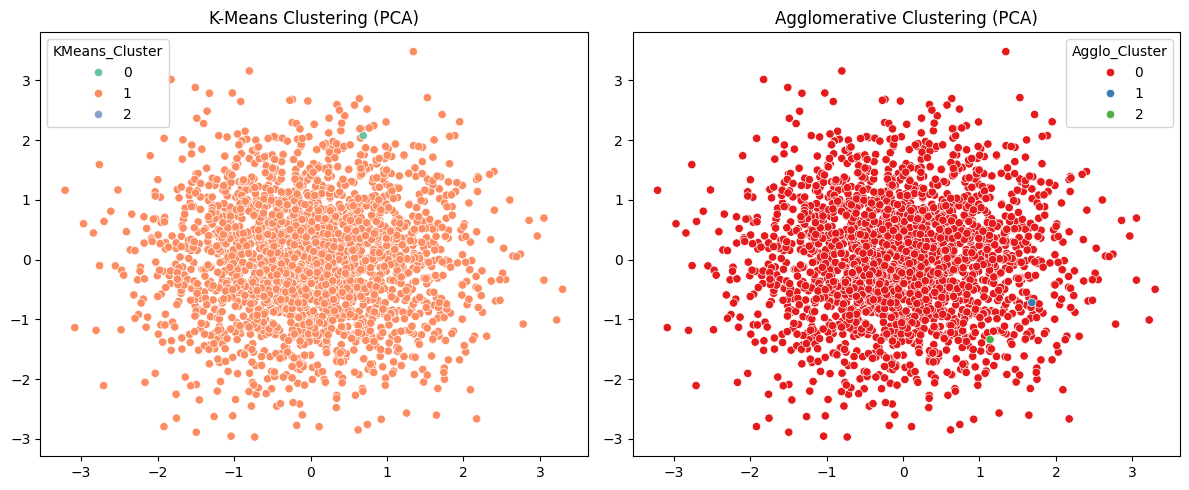

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1,2,1)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title("K-Means Clustering (PCA)")

# Agglomerative
plt.subplot(1,2,2)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Agglo_Cluster'], palette='Set1')
plt.title("Agglomerative Clustering (PCA)")

plt.tight_layout()
plt.show()

#2) Evaluasi Clustering

##1. Import Library

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
from itertools import combinations
import matplotlib.cm as cm

##2. Elbow Method

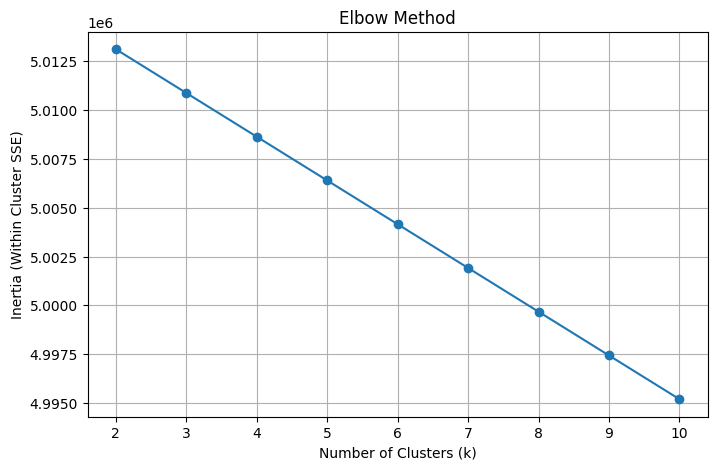

In [11]:
# Elbow Method
inertia = []
K_range = range(2, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within Cluster SSE)")
plt.grid(True)
plt.show()

##3. Evaluasi Sillhouette, Calinski-Harabasz, Davies-Bouldin

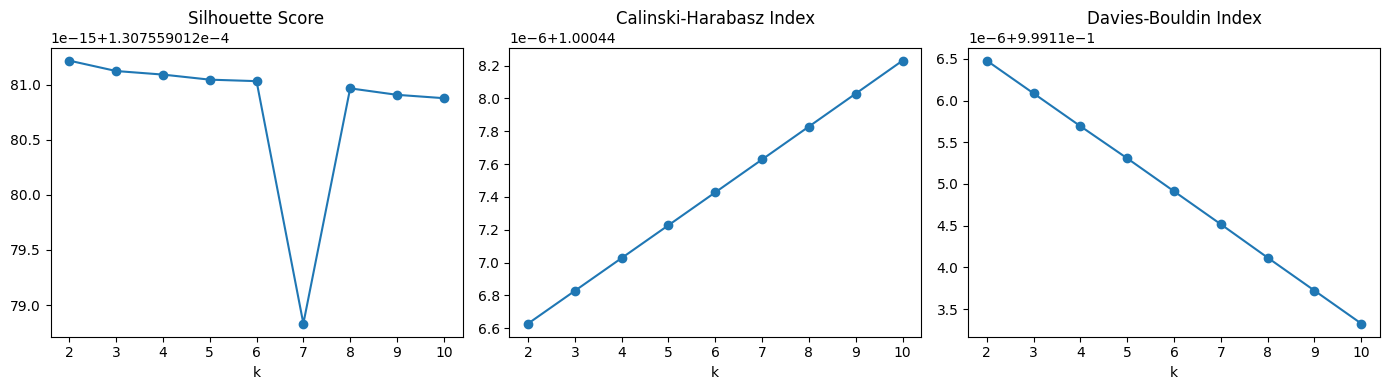

In [12]:
# Kita bandingkan untuk range K
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_data)

    silhouette = silhouette_score(scaled_data, labels)
    calinski = calinski_harabasz_score(scaled_data, labels)
    davies = davies_bouldin_score(scaled_data, labels)

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Plot semua metrik
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k")

plt.subplot(1,3,2)
plt.plot(K_range, calinski_scores, marker='o')
plt.title("Calinski-Harabasz Index")
plt.xlabel("k")

plt.subplot(1,3,3)
plt.plot(K_range, davies_scores, marker='o')
plt.title("Davies-Bouldin Index")
plt.xlabel("k")

plt.tight_layout()
plt.show()

##4. Dunn Index

In [13]:
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    inter_dists = []
    intra_dists = []

    for i, j in combinations(unique_clusters, 2):
        cluster_i = X[labels == i]
        cluster_j = X[labels == j]
        dist = np.min(cdist(cluster_i, cluster_j))
        inter_dists.append(dist)

    for cluster in unique_clusters:
        points = X[labels == cluster]
        if len(points) > 1:
            dist = np.max(cdist(points, points))
            intra_dists.append(dist)

    return np.min(inter_dists) / np.max(intra_dists)

# Hitung Dunn untuk k=3 (KMeans)
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(scaled_data)
dunn_kmeans = dunn_index(scaled_data, kmeans3.labels_)

# Dunn untuk Agglomerative (juga k=3)
agglo3 = AgglomerativeClustering(n_clusters=3).fit(scaled_data)
dunn_agglo = dunn_index(scaled_data, agglo3.labels_)

print(f"Dunn Index KMeans (k=3): {dunn_kmeans:.4f}")
print(f"Dunn Index Agglomerative (k=3): {dunn_agglo:.4f}")

Dunn Index KMeans (k=3): 0.7071
Dunn Index Agglomerative (k=3): 0.7071


##5. Interpretasi Metriks

|Metrik|Arti|
|-|-|
|Elbow/Inertia|Semakin kecil, semakin kompak cluster-nya (tapi bisa overfit).|
|Silhouette|Semakin tinggi (mendekati 1), semakin bagus pemisahan antar cluster.|
|Calinski-Harabasz|Semakin tinggi, semakin bagus pemisahan antar cluster.|
|Davies-Bouldin|Semakin kecil, semakin baik cluster-nya.|
|Dunn Index|Semakin tinggi, semakin bagus karena jarak antar cluster besar|

Matriks yang terbaik:
Biasanya Silhouette Score dan Calinski-Harabasz Index paling umum dan intuitif. Tapi kita bisa bandingkan semuanya:
- Jika Silhouette tinggi dan Davies-Bouldin rendah → clustering bagus
- Dunn Index tinggi → cluster saling berjauhan dan rapat
- Gunakan gabungan dari semua metrik, jangan hanya 1

#3) Penjelasan Persamaan Matematika
##1. K-Means Clustering
Tujuan K-Means adalah meminimalkan total jarak kuadrat antara setiap titik dan pusat cluster-nya:
$$
J = \sum_{i=1}^k\sum_{x\in C_i} ||x-μ_i||^2
$$

Keterangan:
- $k$ = jumlah cluster
- $C_i$ = himpunan titik pada cluster ke-$i$
- $μ_i$ = pusat (centroid) dari cluster ke-$i$
- $||x-μ_i||^2$ = jarak kuadrat antara titik $x$ dan centroid-nya<br><br>

##2. Agglomerative Clustering
Metode Hierarchical Clustering ini tidak memiliki satu rumus cost function seperti K-Means. Namun, ide utamanya adalah:
- Awalnya setiap titik adalah 1 cluster
- Gabungkan dua cluster terdekat berdasarkan linkage:

Linkage paling umum digunakan:
- Single Lingkage
$$
D(C_i, C_j) = \underset {\text{x ∈ C_i,y ∈ C_j}}{\text{min}} ||x-y||
$$
- Complete Lingkage
$$
D(C_i, C_j) = \underset {\text{x ∈ C_i,y ∈ C_j}}{\text{max}} ||x-y||
$$
- Average Linkage
$$
D(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j} ||x-y||
$$<br><br>

##3. Inertia / Elbow Method
Tujuannya adalah mencari titik "tekukan" (elbow) saat penambahan cluster tidak menurunkan inertia secara signifikan.
$$
Inertia = \sum_{i=1}^n ||x_i - μ_{c(i)}||^2
$$

Keterangan:
- $x_i$ = titik data ke-$i$
- $μ_{c(i)}$ = centroid dari cluster tempat x_i berada<br><br>

##4. Silhoutte Coefficient
Untuk setiap titik-$i$:
$$
s(i) = \frac{c(i) - a(i)}{max(a(i)), b(i)}
$$

Keterangan:
- $a(i)$ = rata-rata jarak antara $i$ dan semua titik dalam cluster yang sama
- $b(i)$ = jarak terkecil rata-rata dari $i$ ke semua cluster lain
- Nilai $s(i) ]in [-1, 1]$:
  - Dekat dengan 1: sangat cocok dalam clusternya
  - Dekat 0: dekat perbatasan antara dua cluster
  - Negatif: kemungkinan salah cluster<br><br>

##5. Calinski-Harabasz Index
$$
CH = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{n-k}{k-1}
$$

Keterangan:
- $TR(B_k)$ = antara-class dispersion (variasi antar cluster)
- $Tr(W_k)$ = within-class dispersion (variasi dalam cluster)
- $n$ = jumlah total data
- $k$ = jumlah cluster

Semakin besar CH Index, semakin bagus pemisahan cluster-nya.<br><br>

##6. Davies-Bouldin Index
$$
DB = \frac{1}{k} \sum_{i=1}^k \underset{j \not= 1}{max} (\frac{\sigma_i + \sigma_j}{d_{ij}})
$$

Keterangan:
- $\sigma_i$ = rata-rata jarak titik dalam cluster $i$ ke centroid-nya
- $d_{ij}$ = jarak antara centroid cluster $i$ dan $j$

Semakin kecil DB Index, semakin baik karena cluster lebih jauh dan lebih rapat.<br><br>

##7. Dunn Index
$$
D = \frac{min_{i \not= j} d(C_i,C_j)}{max_x δ(C_k)}
$$

Keterangan:
- $d(C_i,C_j)$ = jarak minimum antar dua cluster berbeda
- $δ(C_k)$ = diameter maksimum dari cluster $C_k$ (jarak terbesar antara dua titik dalam cluster)
- Semakin Tinggi nilai Dunn Index, semakin baik cluster karena:
  - antar-cluster jauh (besar numerator)
  - intra-cluster rapat (kecil denominator)